In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.utils import Function


In [3]:
def value(value: np.array):
    return value[0] ** 2 + value[1] ** 2

def gradient(x: np.array):
    return np.array([
        2 * x[0], 
        2 * x[1]
    ])    

def hessian(x):
    return np.array([
        [2, 0],
        [0, 2]
    ])

f1 = Function(value, gradient, hessian)

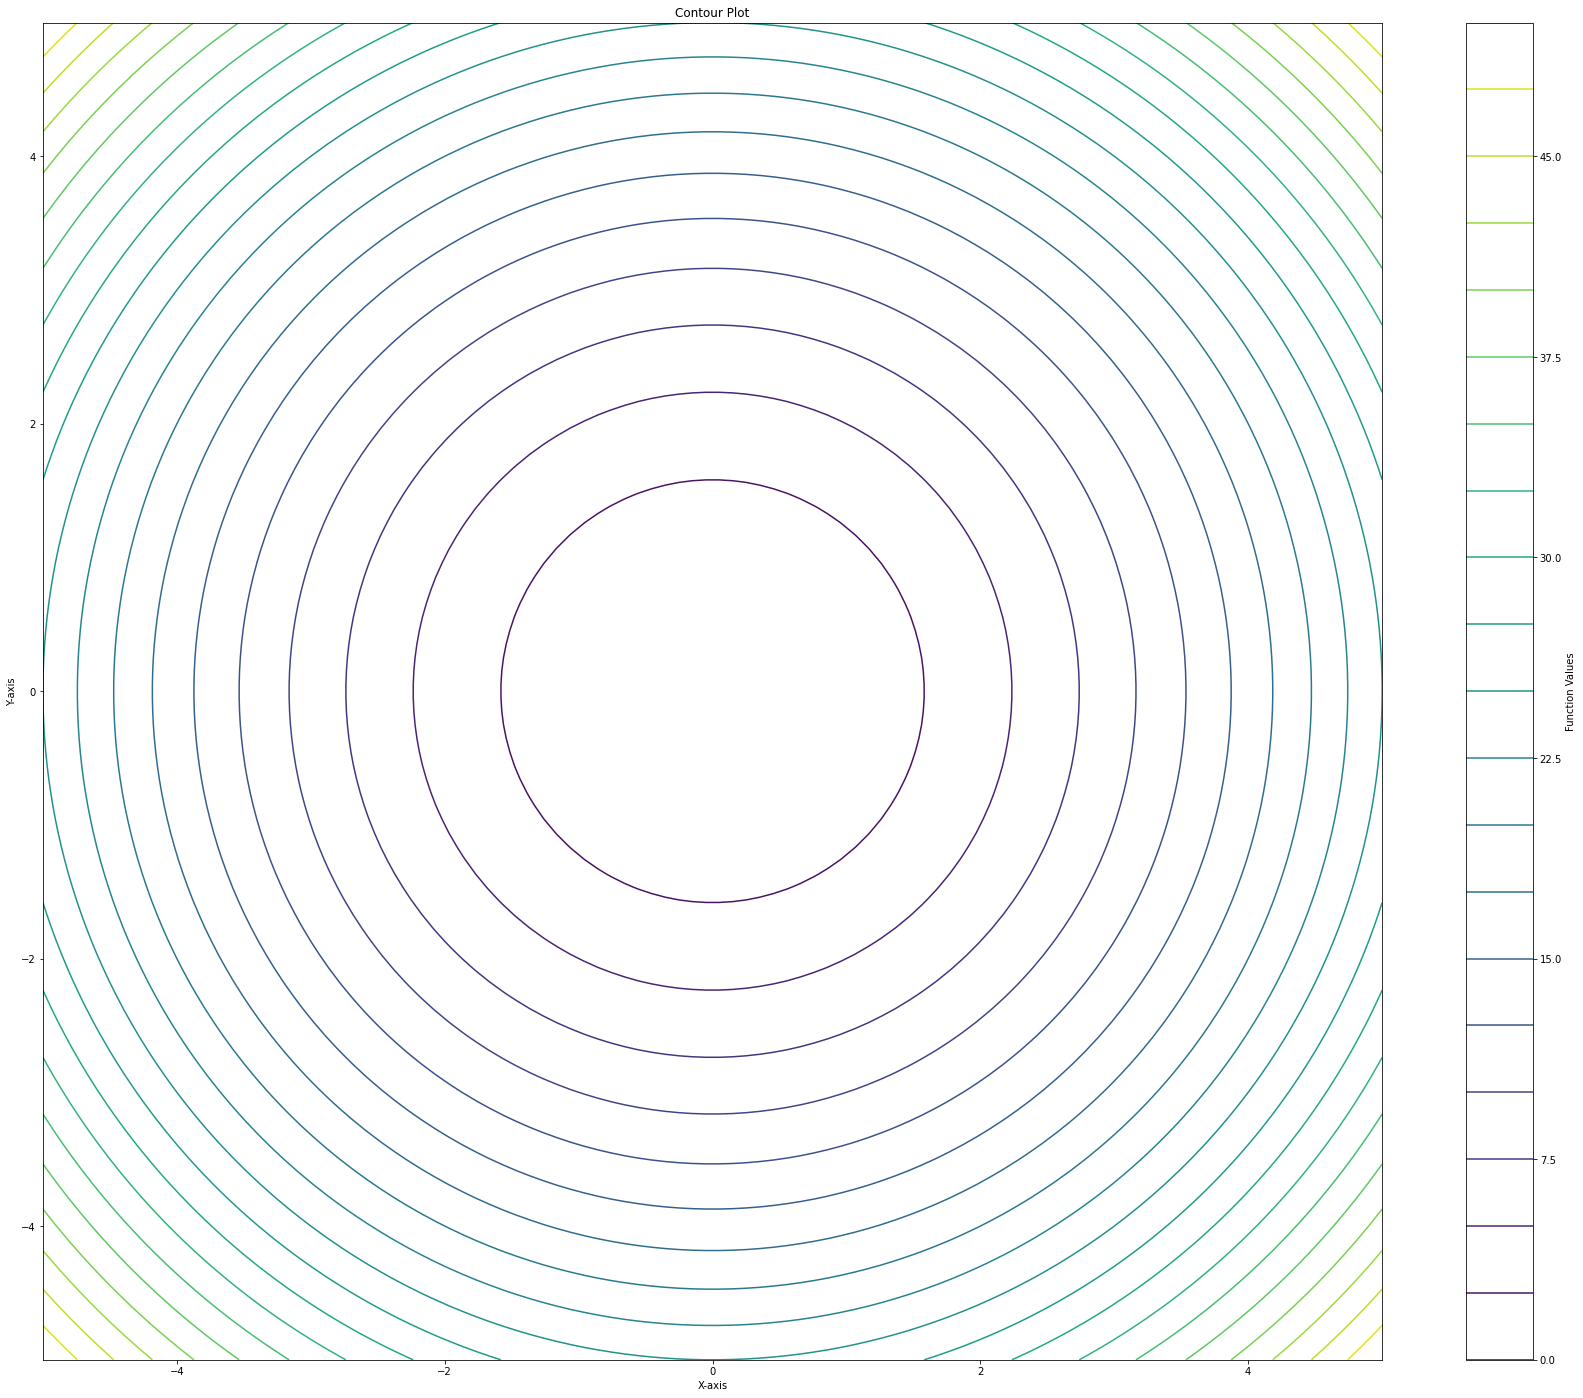

In [4]:
f1.plot_contour()

In [5]:
# let's consider the constraint x>=2y >>>> g(x, y) = 2y-x <= 0

def fc(x):
    return 2*x[1]-x[0]

def dfc(x):
    return np.array([-1, 2])

def ddfc(x):
    return np.array([
        [-1, 0],
        [0, 2]
    ])


constraint_f = Function(fc, dfc, ddfc)

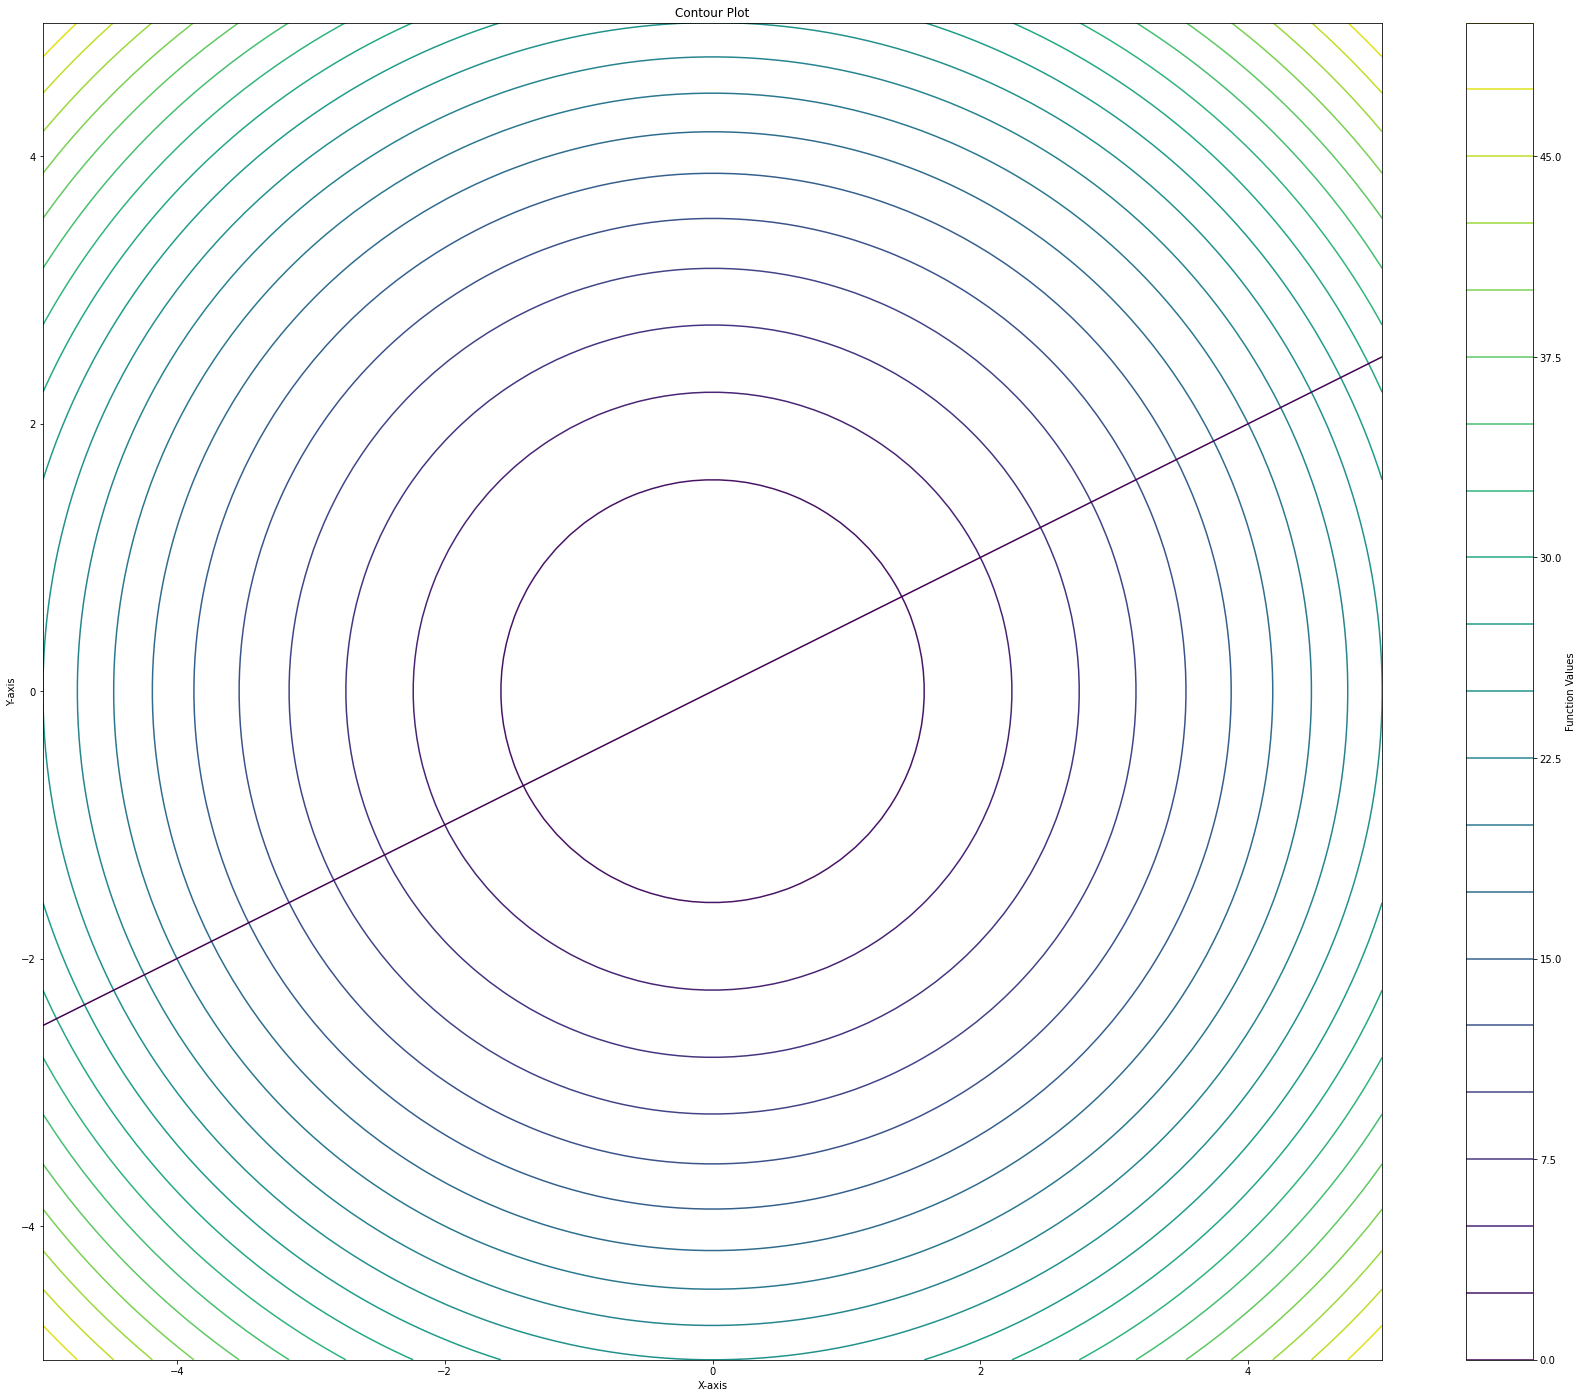

In [6]:
from utils.plotting import Plotter

plotter = Plotter(f=f1, constraints=[('constraint_1', constraint_f)])
plotter.plot(['constraint_1'])

some ontes about it 
- put lambda 0 
- starting computing iterations


In [7]:
import numpy as np
from utils.utils import Function, GradientDescent

In [8]:
def f33(x):
    return x[0] ** 2 + x[1] ** 2

def df33(x):
    return np.array([2*x[0], 2*x[1]])

def ddf33(x):
    return np.array([[2, 0], [0, 2]])

ffff = Function(f33, df33, ddf33)


In [9]:
# define the first constraints
constraint1 = Function(
    lambda x: -x[0] - x[1] + 1,
    lambda x: np.array([-1, -1]),
    lambda x: np.array([[0, 0], [0, 0]])
)

In [10]:
from utils.utils import UzawaSolver

uzawa = UzawaSolver(ffff, [constraint1])

uzawa.solve_min(x0_internal=np.array([-50, 8]), _lambda=np.array([5]), use_epsilon=True, epsilon=1e-30, max_iter=50,
                decay_type='linear', decay_param=0.05)


array([0.49909905, 0.5001338 ])

In [11]:
# the training information is available in the uzawa object
len(uzawa.f_gradient_history), \
len(uzawa.f_value_history), \
len(uzawa.lagrangian_value_history), \
len(uzawa.lagrangian_gradient_history), \
len(uzawa.lambda_history), uzawa.iters, \
len(uzawa.f_increment_history), \
len(uzawa.lagrangian_increment_history), \
len(uzawa.tau_history)

(6, 6, 6, 6, 6, 6, 6, 6, 6)

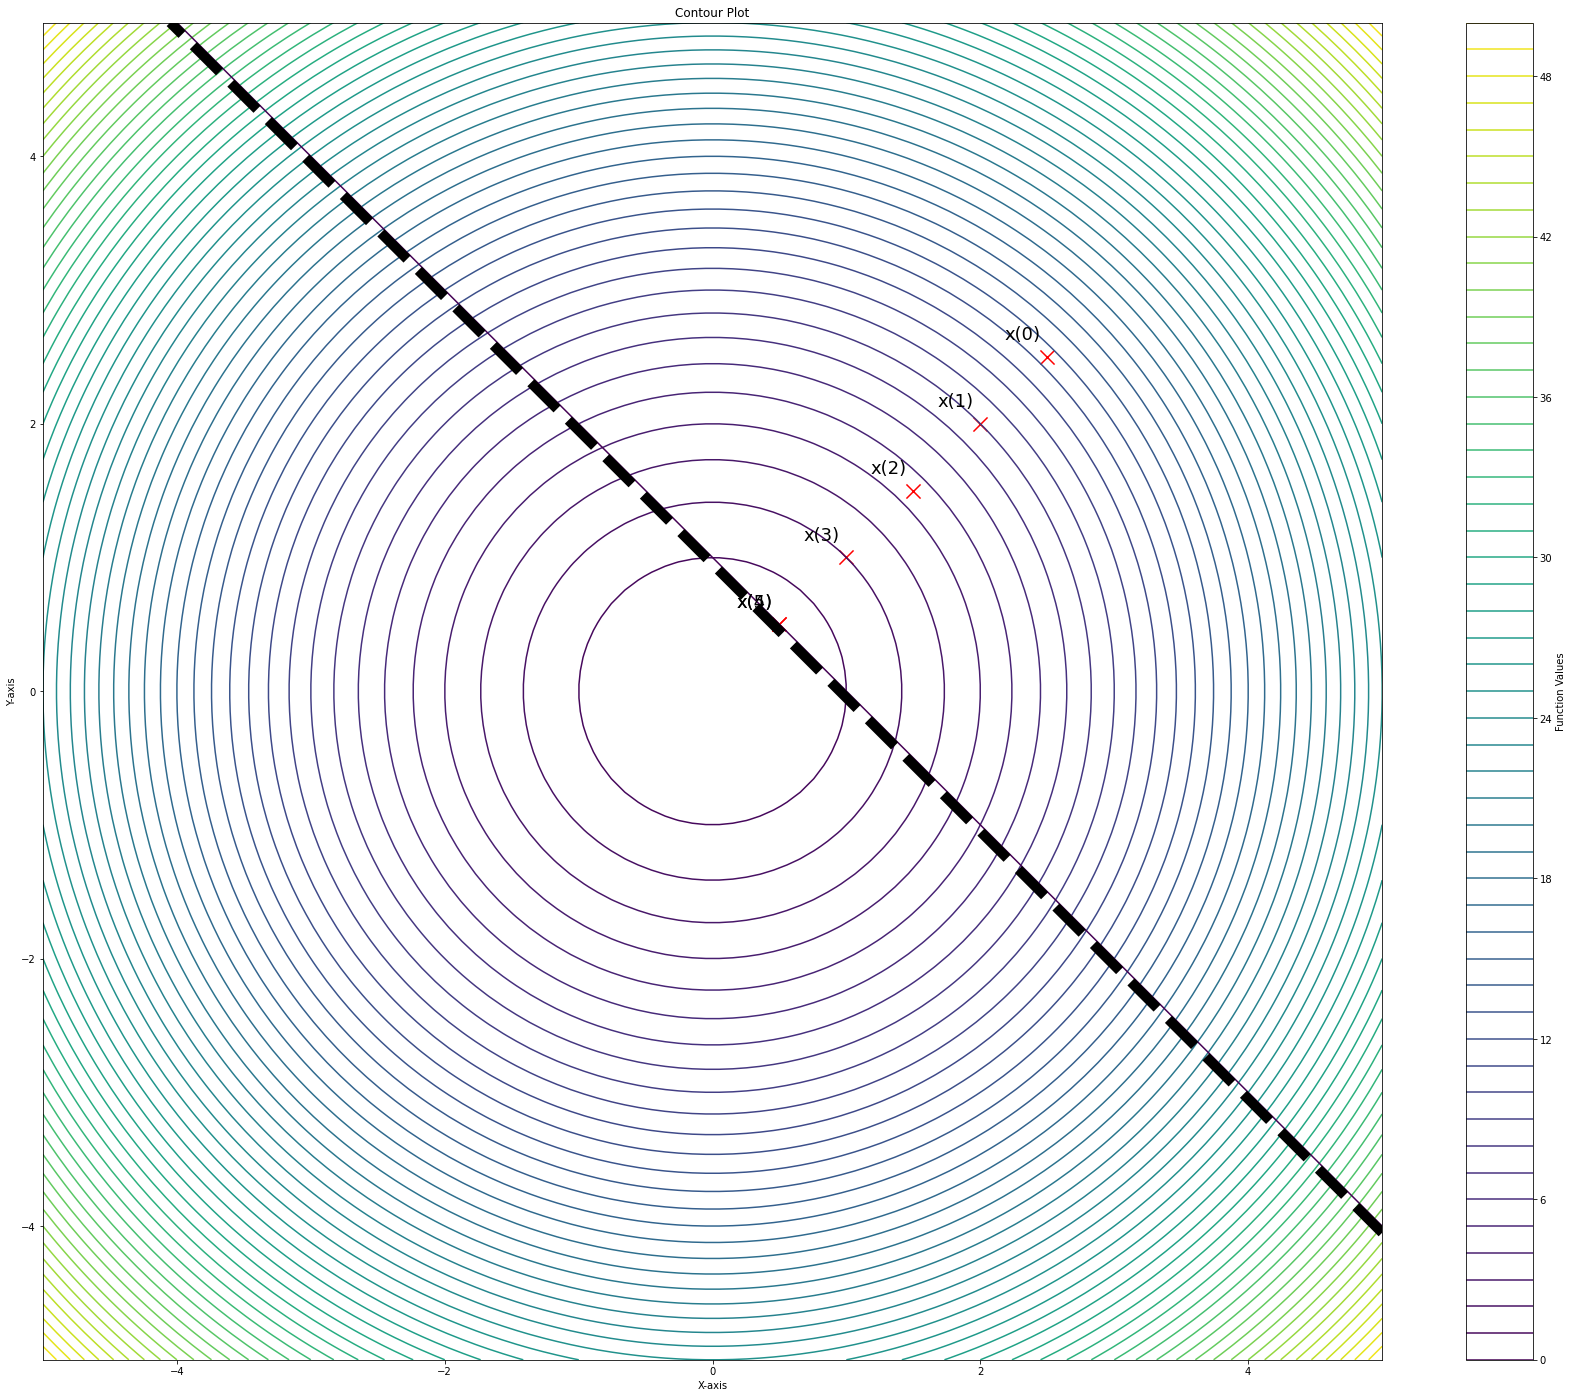

In [12]:
from utils.utils import UzawaPlotter

plotter = UzawaPlotter(solver=uzawa)
plotter.plot()

In [7]:
uzawa.x_history

[array([2.49906337, 2.50009812]),
 array([1.99907229, 2.00010704]),
 array([1.49908121, 1.50011596]),
 array([0.99909013, 1.00012488]),
 array([0.49909905, 0.5001338 ]),
 array([0.49909905, 0.5001338 ])]

In [8]:
uzawa.lambda_history

[array([1]), array([1]), array([1]), array([1]), array([1]), array([1])]

In [9]:
uzawa.lagrangian_increment_history

[array([-0.00187326,  0.00019625]),
 array([1.78405962e-05, 1.78405962e-05]),
 array([1.78405962e-05, 1.78405962e-05]),
 array([1.78405962e-05, 1.78405962e-05]),
 array([1.78405962e-05, 1.78405962e-05]),
 array([0., 0.])]

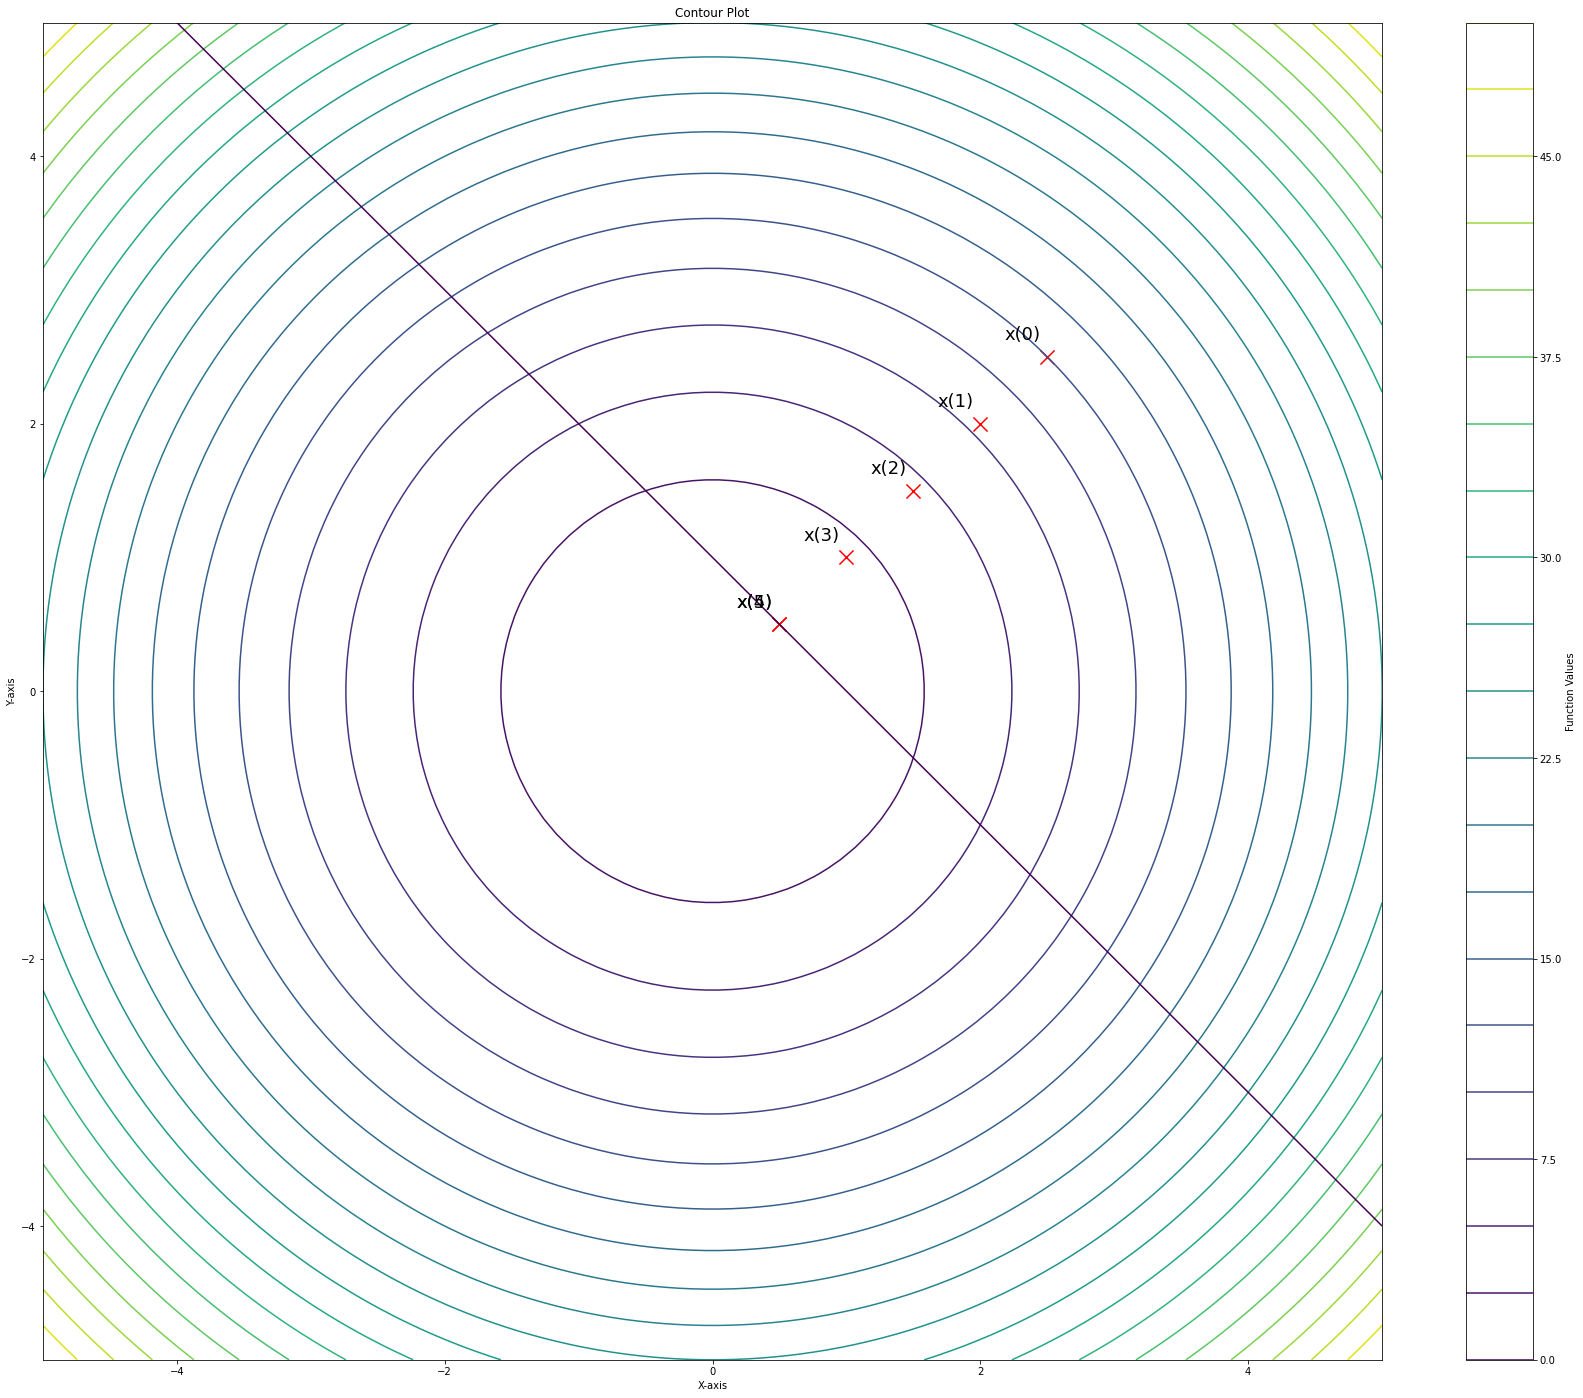

In [10]:
from utils.utils import UzawaPlotter

plotterr = UzawaPlotter(solver=uzawa)
plotterr.plot()



In [11]:
uzawa.lambda_history

[array([1]), array([1]), array([1]), array([1]), array([1]), array([1])]

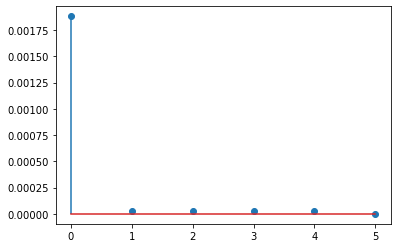

In [33]:
plotter.plot_lagrangian_increments(use_log=True)

In [14]:
gd_solver = GradientDescent(ffff)
x_history_2, gradient_history_2, lr_history_2, value_history_2, current_iteration_2 = \
gd_solver.solve(np.array([1, 3]))

continue: True


In [22]:
f22 = Function()

TypeError: __init__() missing 3 required positional arguments: 'compute', 'gradient', and 'hessian'